In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

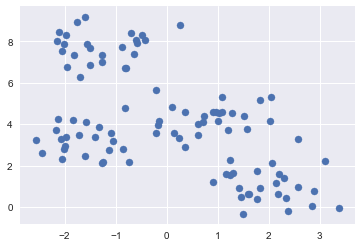

In [39]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=100,centers=4,cluster_std=0.70,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [30]:
y_kmeans

array([0, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 3, 2, 0, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 2, 1, 2, 2, 3, 0, 1, 2, 1, 3, 0, 3, 1, 3,
       3, 1, 2, 3, 0, 0, 0, 2, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 2, 0, 2, 1,
       3, 3, 2, 0, 1, 2, 0, 1, 0, 0, 0, 3, 2, 2, 2, 1, 3, 0, 2, 3, 2, 2,
       0, 0, 0, 3, 0, 3, 3, 1, 1, 3, 1, 0])

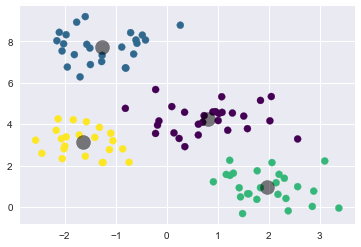

In [31]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        labels = pairwise_distances_argmin(X,centers)
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers ,labels = find_clusters(X,4)
plt.scatter(X[:,0],X[:,1],c = y_kmeans, s =50,cmap = 'viridis')
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5);
        